<a href="https://colab.research.google.com/github/sapna-90/Project_5_Telcom-data/blob/main/Telecom_P5_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import numpy as np
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler

In [ ]:
Dataset = pd.read_excel(r"/content/telcom_data_Project 5.xlsx")

Task 1 - User OverView Analysis

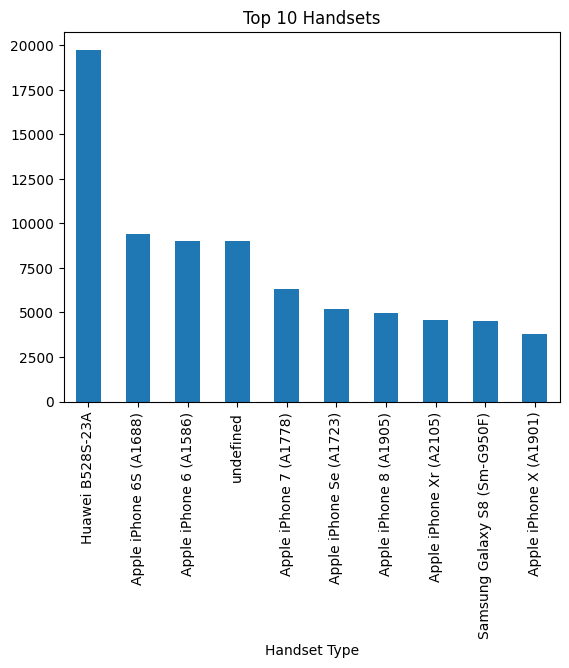

In [ ]:
# Aggregate the data
# Top ten handsets
Top_10_handsets = Dataset['Handset Type'].value_counts().head(10)
Top_10_handsets.plot(kind = 'bar', title = 'Top 10 Handsets')
plt.show()

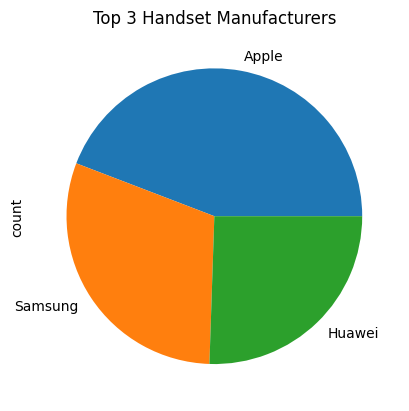

In [ ]:
# Top 3 Handset Manufacturers
Top_3_manufacturers = Dataset['Handset Manufacturer'].value_counts().head(3)
Top_3_manufacturers.plot(kind='pie', title='Top 3 Handset Manufacturers')
plt.show()

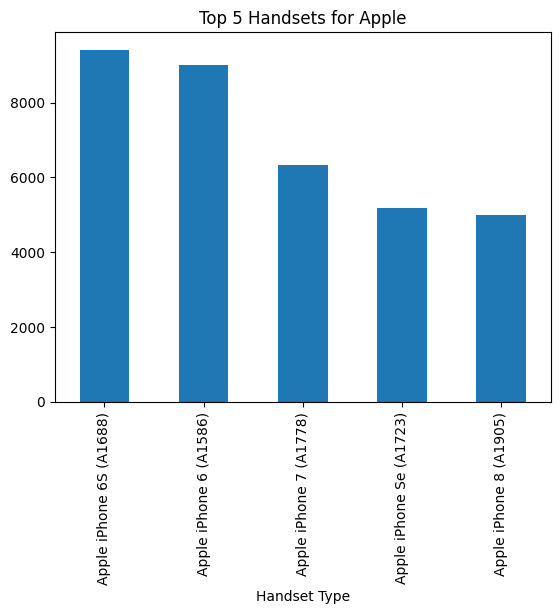

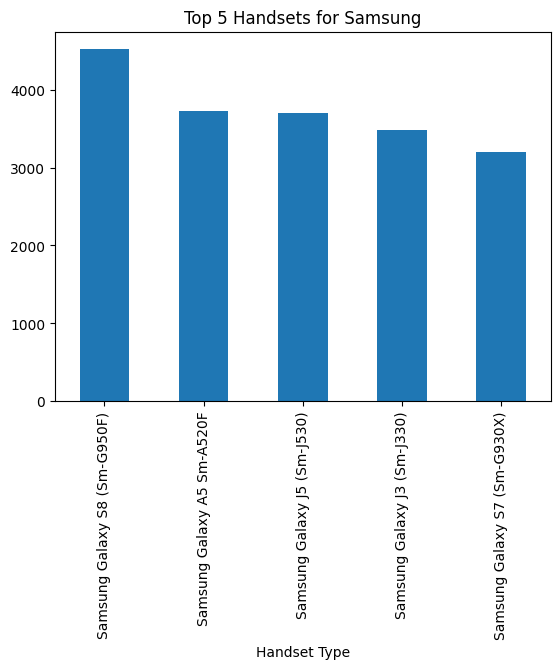

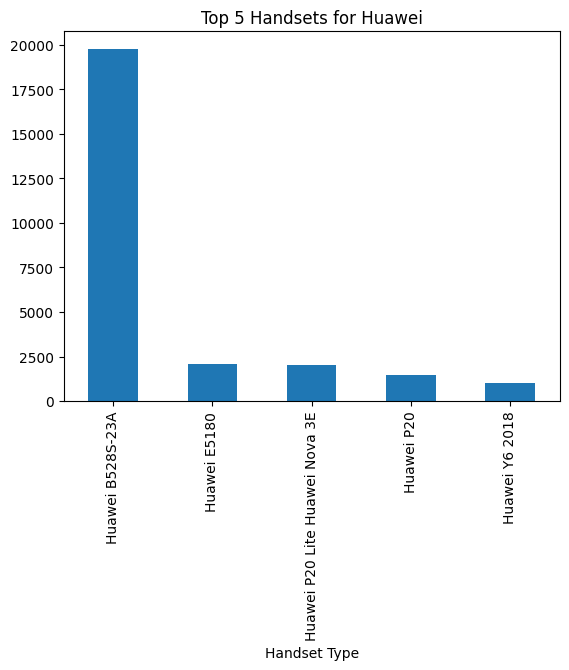

In [ ]:
# Top 5 Handsets per Manufacturer
for manufacturer in Top_3_manufacturers.index:
    Top_5_handsets = Dataset[Dataset['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    Top_5_handsets.plot(kind='bar', title=f'Top 5 Handsets for {manufacturer}')
    plt.show()

Exploratory Data Analysis

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [ ]:
Dataset.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
# To check if there are any missing values
Dataset.isnull().sum().sort_values(ascending=False)

,0
Nb of sec with 37500B < Vol UL,130254
Nb of sec with 6250B < Vol UL < 37500B,111843
Nb of sec with 125000B < Vol DL,97538
TCP UL Retrans. Vol (Bytes),96649
Nb of sec with 31250B < Vol DL < 125000B,93586
Nb of sec with 1250B < Vol UL < 6250B,92894
Nb of sec with 6250B < Vol DL < 31250B,88317
TCP DL Retrans. Vol (Bytes),88146
HTTP UL (Bytes),81810
HTTP DL (Bytes),81474


In [ ]:
(Dataset.isnull().sum()/Dataset.shape[0]*100).sort_values(ascending=False)

,0
Nb of sec with 37500B < Vol UL,86.835421
Nb of sec with 6250B < Vol UL < 37500B,74.561503
Nb of sec with 125000B < Vol DL,65.024900
TCP UL Retrans. Vol (Bytes),64.432237
Nb of sec with 31250B < Vol DL < 125000B,62.390251
Nb of sec with 1250B < Vol UL < 6250B,61.928920
Nb of sec with 6250B < Vol DL < 31250B,58.877607
TCP DL Retrans. Vol (Bytes),58.763608
HTTP UL (Bytes),54.539636
HTTP DL (Bytes),54.315638


In [ ]:
# To remove the columns whose null values are more than 60%

# Calculate the % of null values in each column
null_percentage = (Dataset.isnull().sum())/len(Dataset)*100

# Get the columns whose columns have more than 60% null values
columns_to_drop = null_percentage[null_percentage > 60].index

# Drop the columns
Dataset.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
(Dataset.isnull().sum()/Dataset.shape[0]*100).sort_values(ascending=False)

,0
Nb of sec with 6250B < Vol DL < 31250B,58.877607
TCP DL Retrans. Vol (Bytes),58.763608
HTTP UL (Bytes),54.539636
HTTP DL (Bytes),54.315638
Avg RTT DL (ms),18.552543
Avg RTT UL (ms),18.541210
Last Location Name,0.768662
MSISDN/Number,0.710662
Nb of sec with Vol UL < 1250B,0.528663
50 Kbps < UL TP < 300 Kbps (%),0.527996


In [ ]:
numerical_cols = Dataset.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each numerical column and fill missing values
for col in numerical_cols:
    Dataset[col] = Dataset[col].fillna(Dataset[col].mean(0))

In [ ]:
categorical_cols = Dataset.select_dtypes(include=['object']).columns

# Iterate through each numerical column and fill missing values
for col in categorical_cols:
    Dataset[col] = Dataset[col].fillna(Dataset[col].mode(0))

In [ ]:
Dataset.isnull().sum().sort_values(ascending=False)

,0
Last Location Name,1153
Handset Manufacturer,572
Handset Type,572
Start,1
End,1
Bearer Id,0
Email DL (Bytes),0
Nb of sec with 6250B < Vol DL < 31250B,0
Nb of sec with Vol DL < 6250B,0
Nb of sec with Vol UL < 1250B,0


In [ ]:
Dataset['Handset Manufacturer'].ffill(inplace=True)
Dataset['Handset Manufacturer'].bfill(inplace=True)

Dataset['Handset Type'].ffill(inplace=True)
Dataset['Handset Type'].bfill(inplace=True)

Dataset['Last Location Name'].ffill(inplace=True)
Dataset['Last Location Name'].bfill(inplace=True)

In [ ]:
Dataset.isnull().sum().sort_values(ascending=False)

,0
Start,1
End,1
Email DL (Bytes),0
Dur. (ms).1,0
Handset Manufacturer,0
Handset Type,0
Nb of sec with 6250B < Vol DL < 31250B,0
Nb of sec with Vol DL < 6250B,0
Nb of sec with Vol UL < 1250B,0
Social Media DL (Bytes),0


In [ ]:
# Create the list of numerical data
numerical_data=[]
for i in Dataset.columns:
  if Dataset[i].dtype!='object':
    numerical_data.append(i)
numerical_data

['Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',

In [ ]:
## now to create a list of categorical data
categorical_data=[]
for i in Dataset.columns:
  if Dataset[i].dtype=='object':
    categorical_data.append(i)
categorical_data

['Bearer Id', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

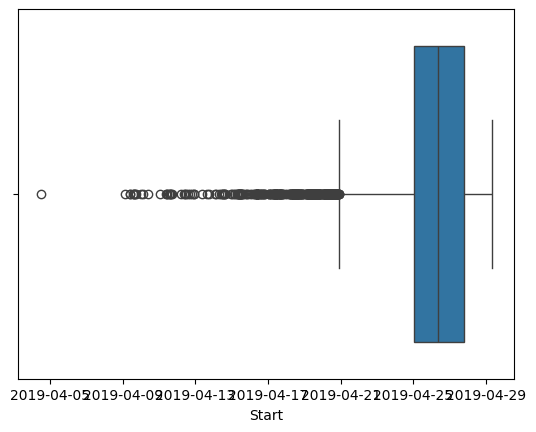

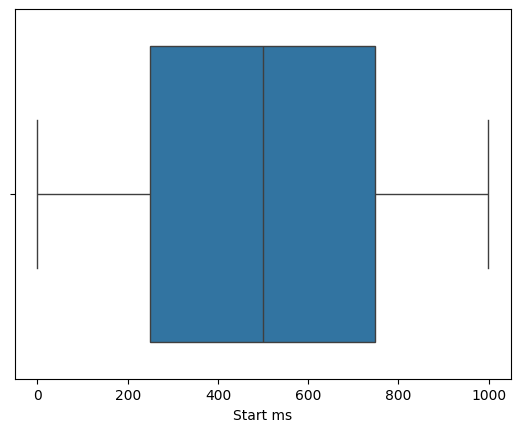

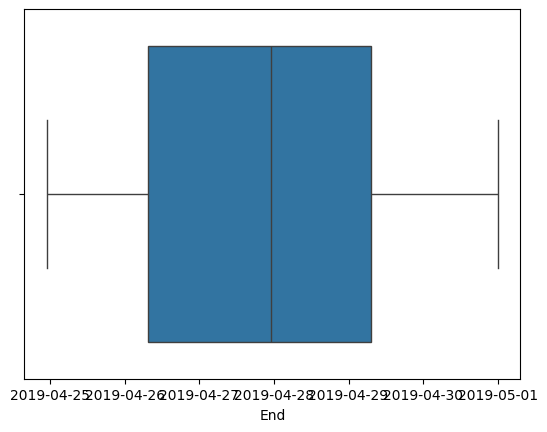

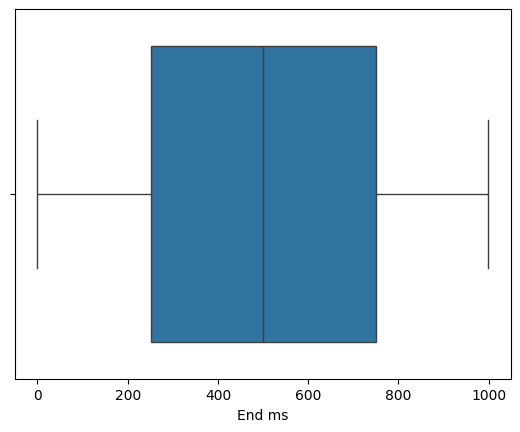

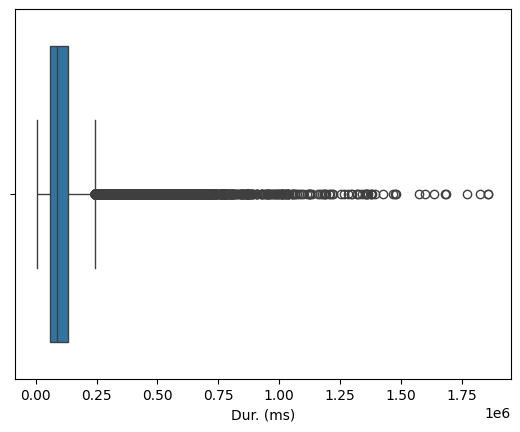

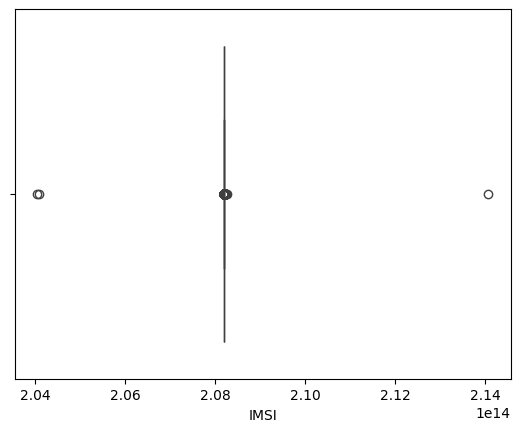

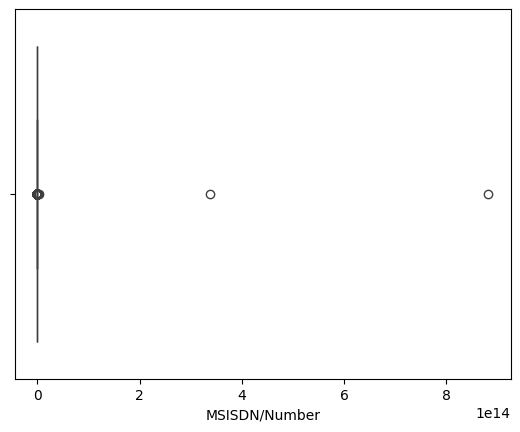

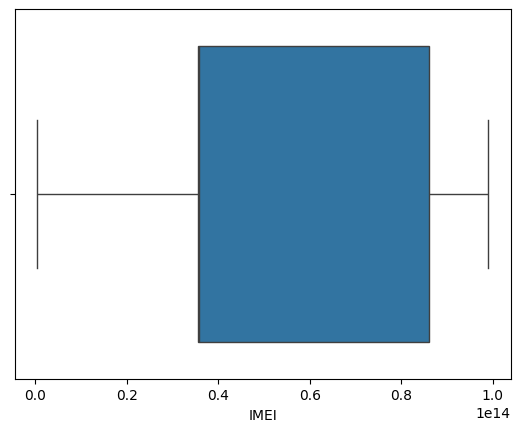

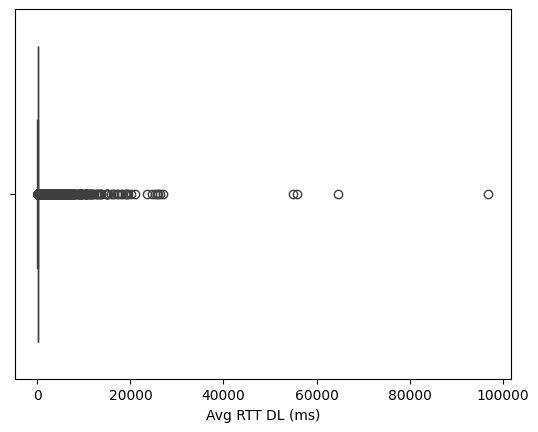

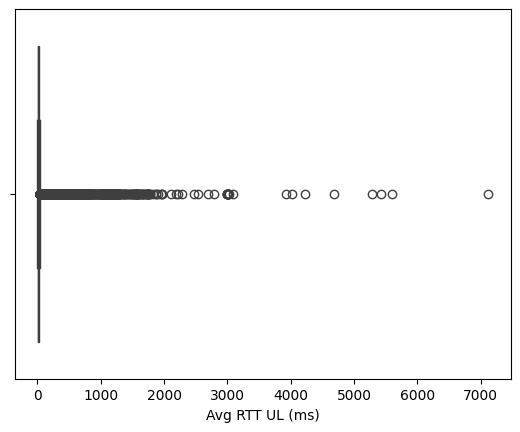

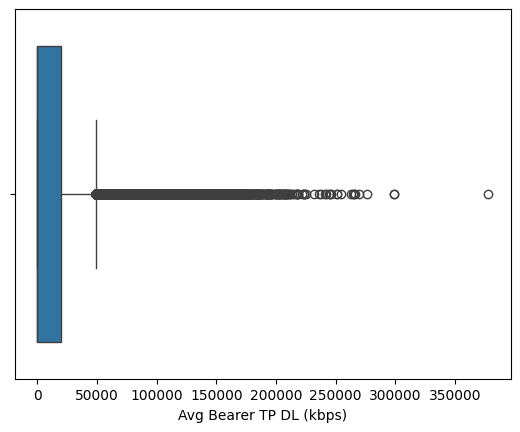

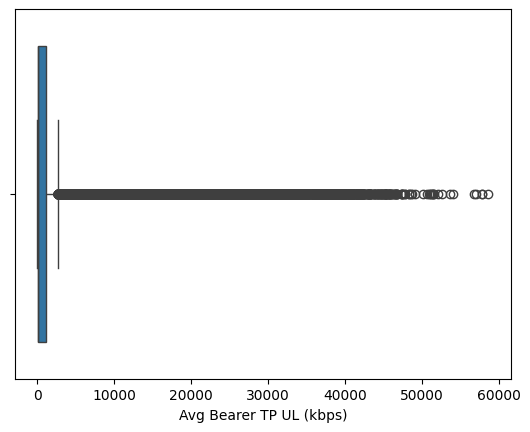

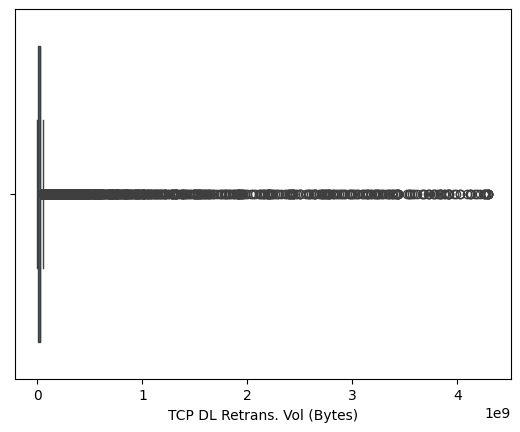

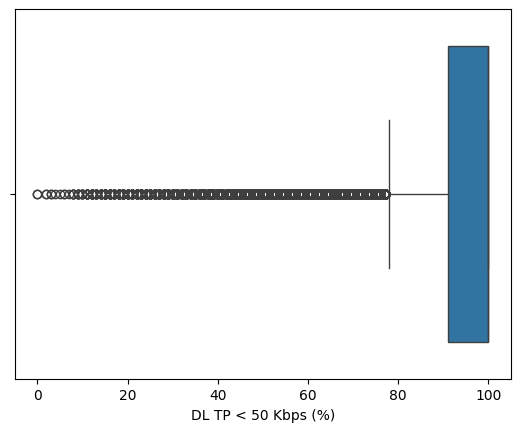

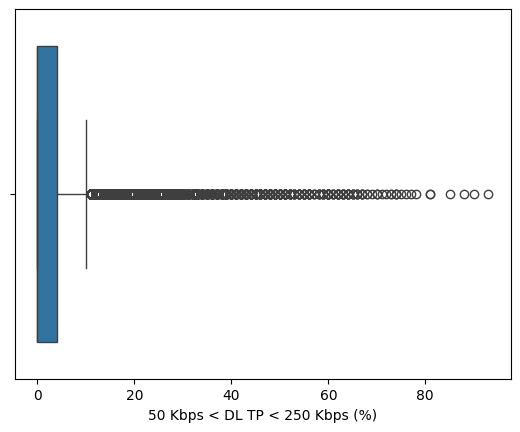

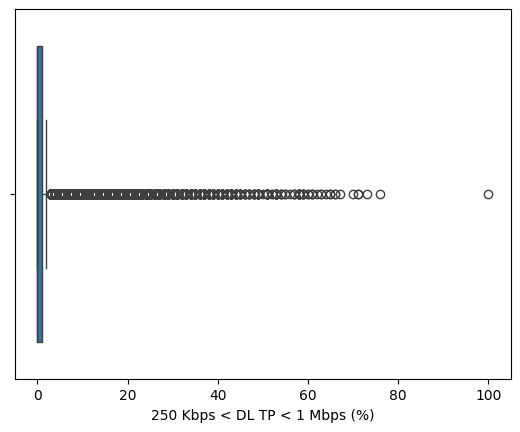

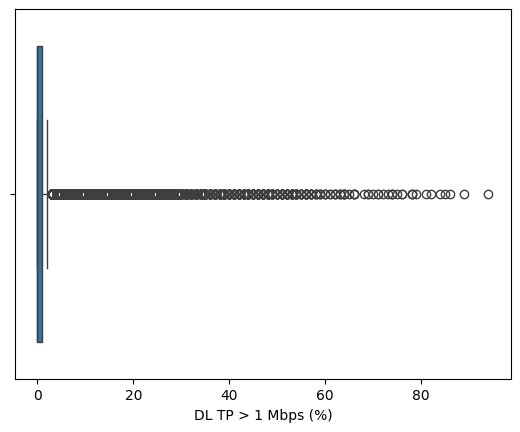

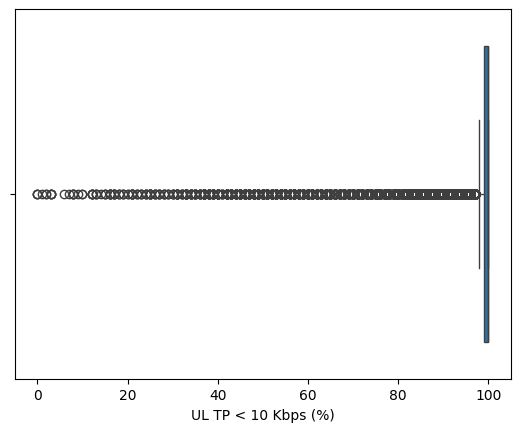

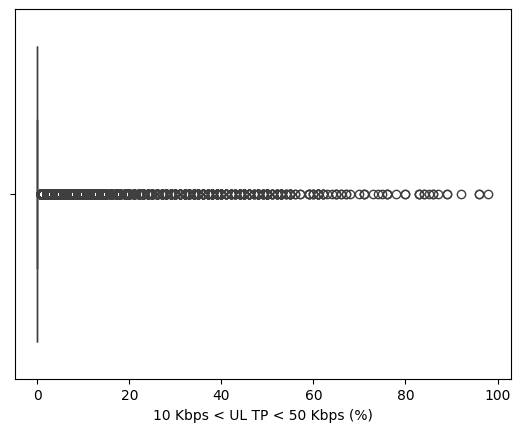

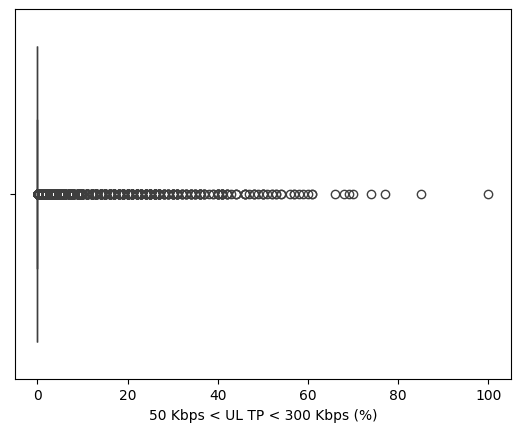

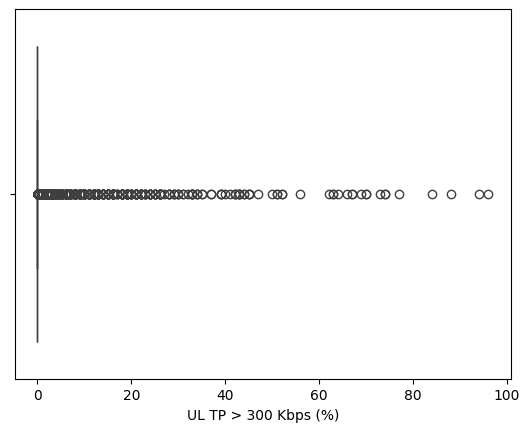

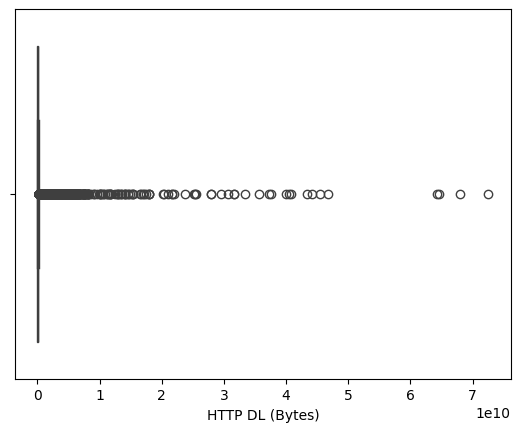

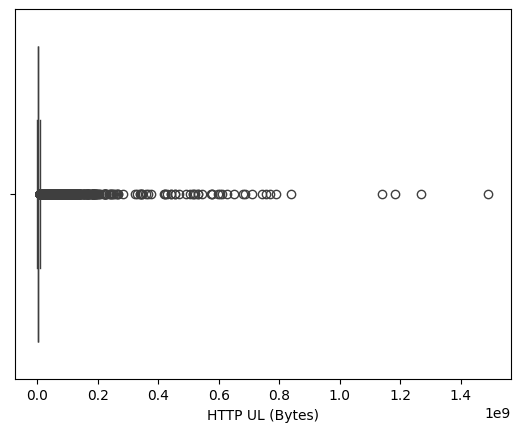

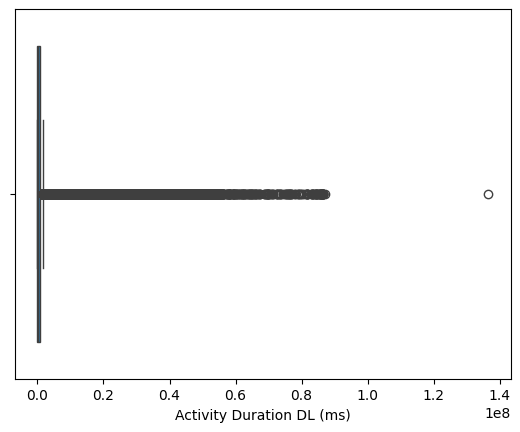

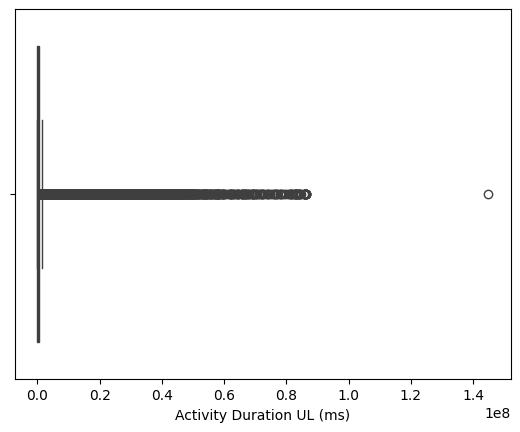

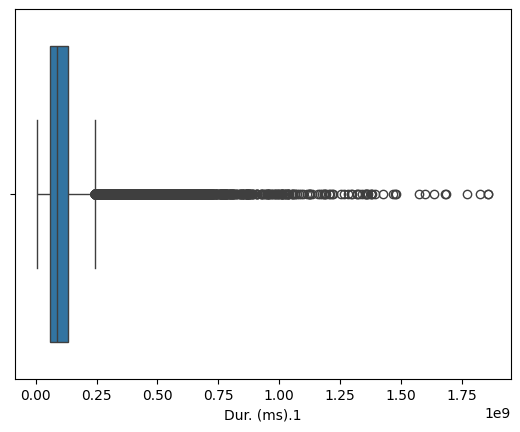

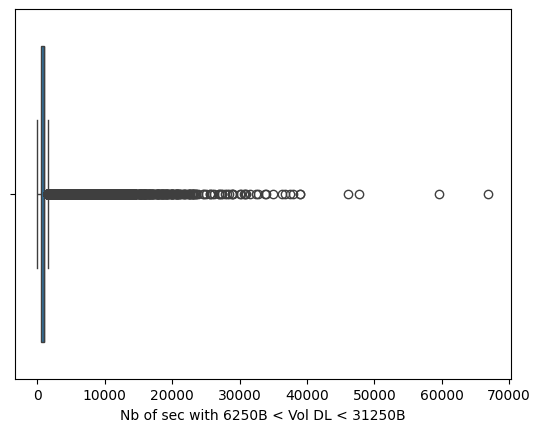

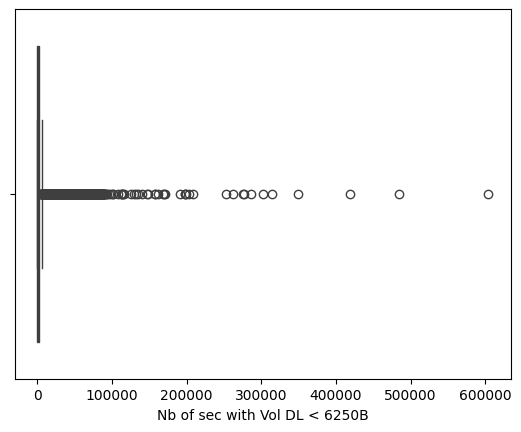

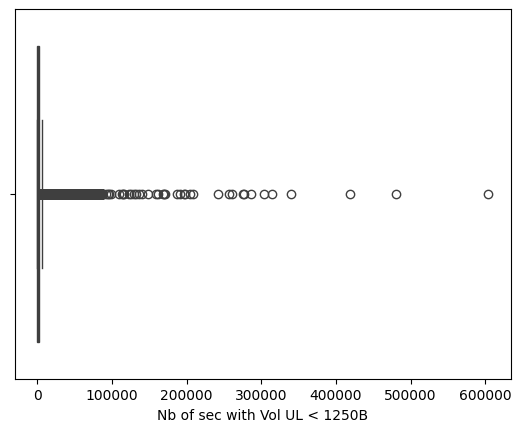

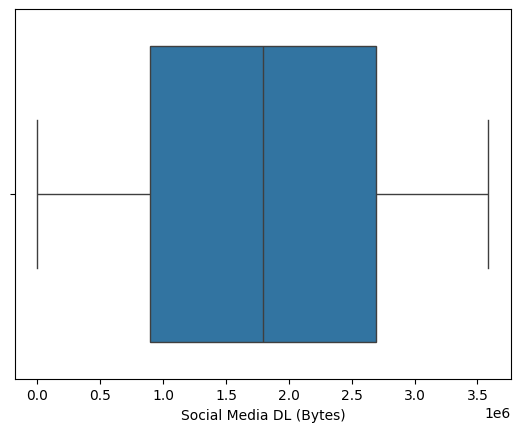

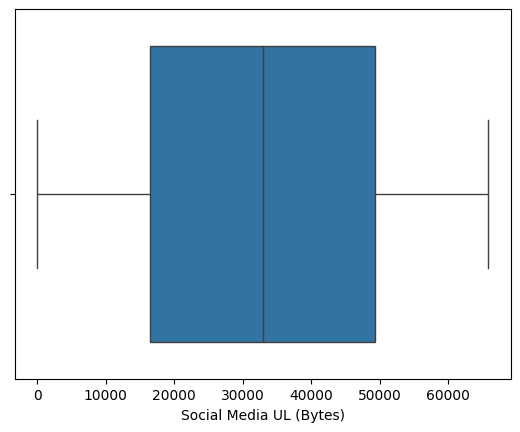

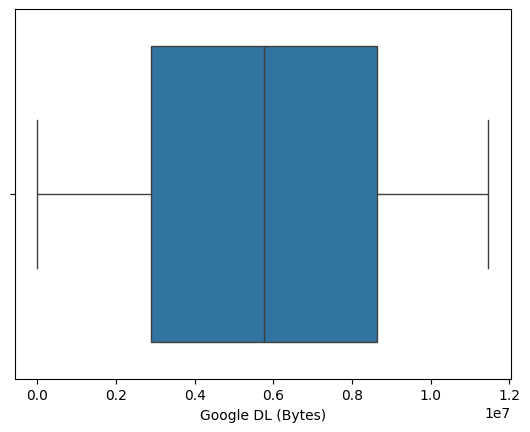

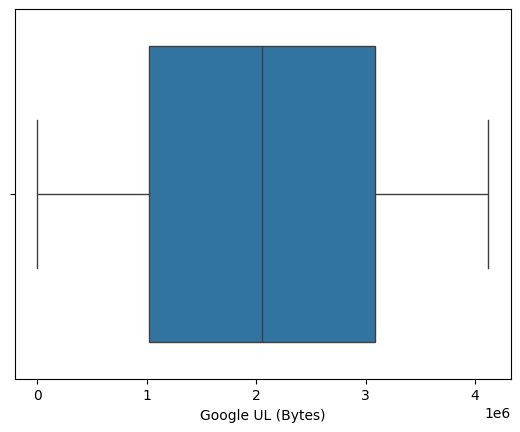

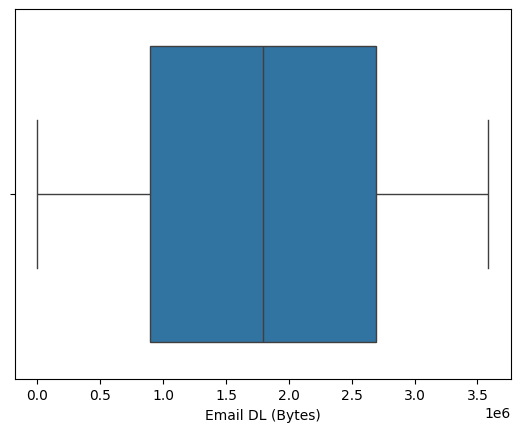

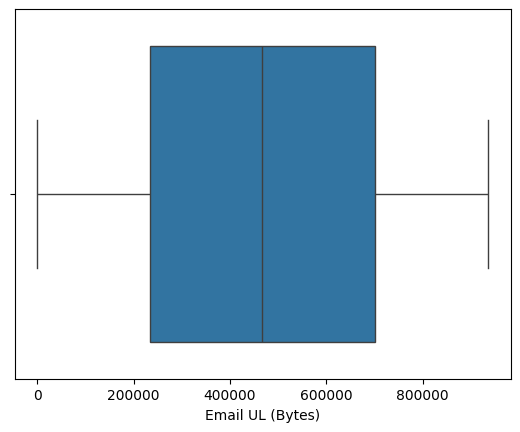

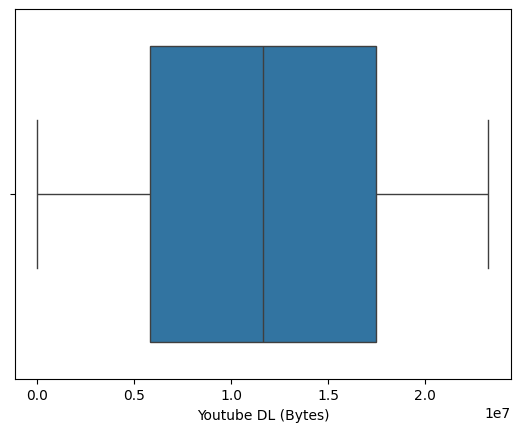

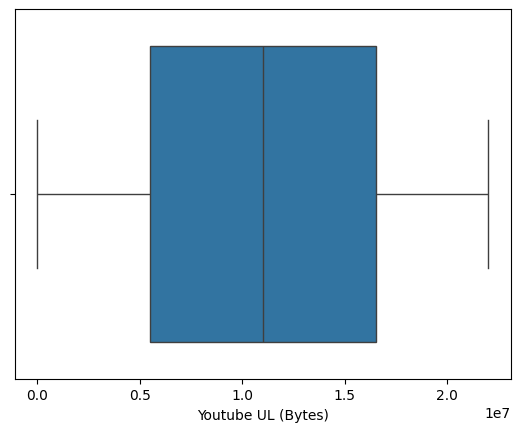

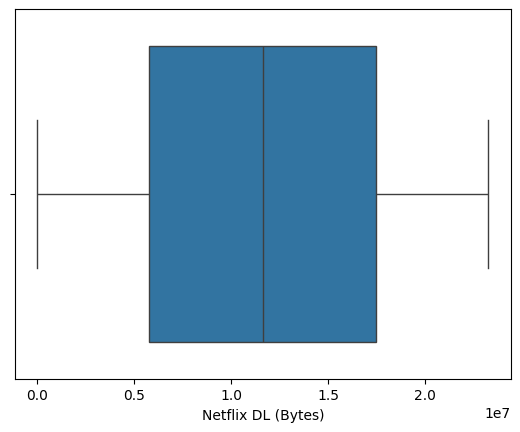

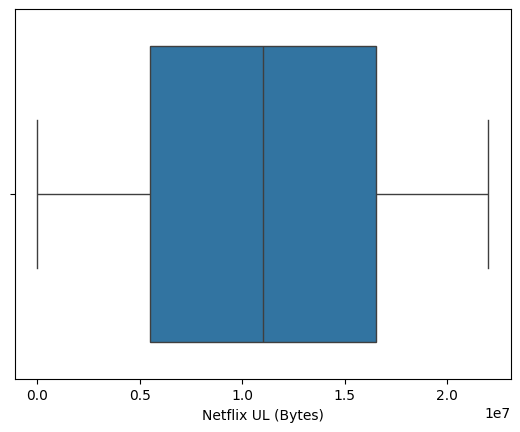

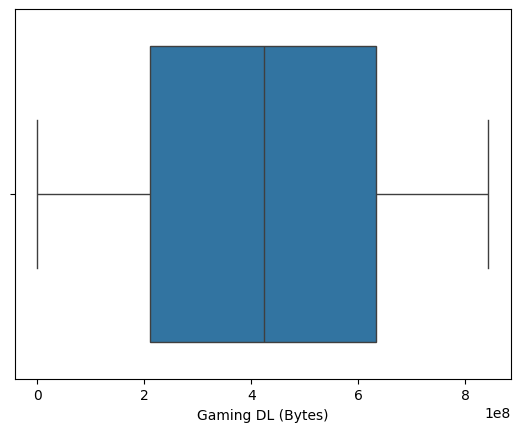

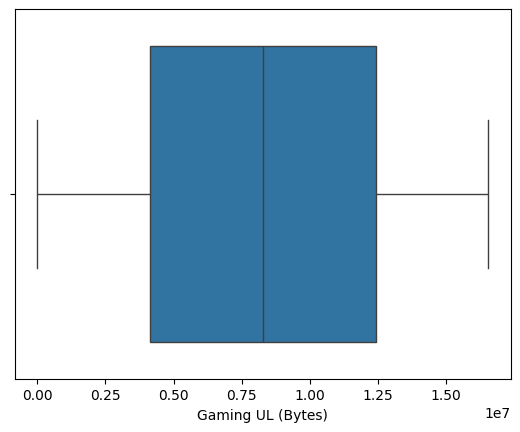

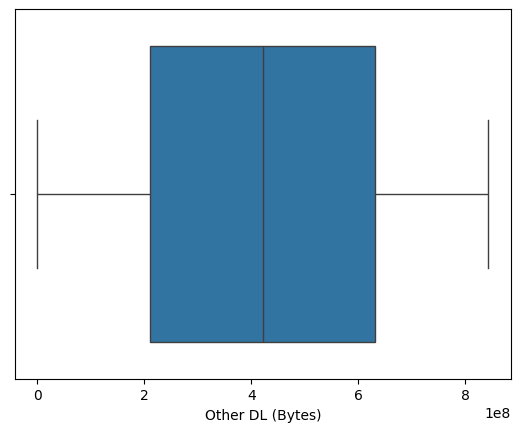

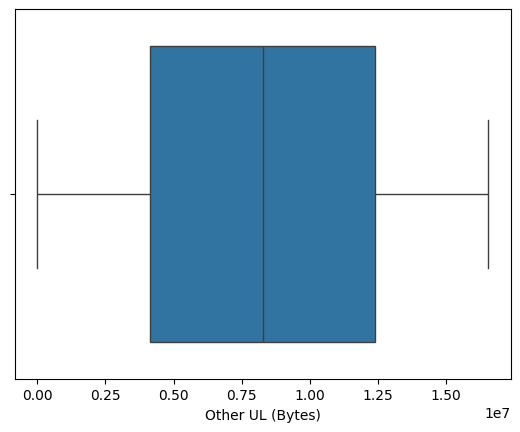

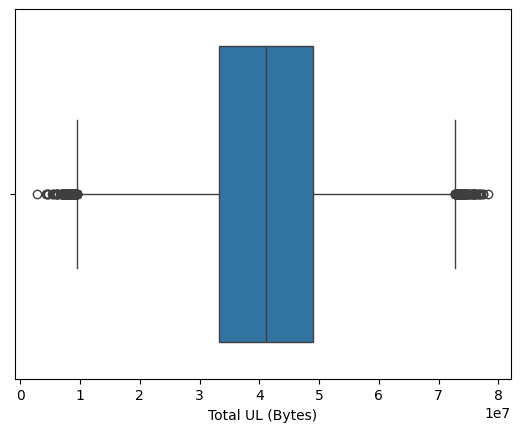

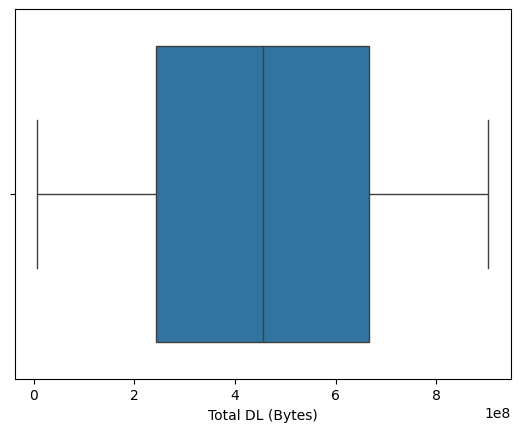

In [ ]:
# Iterate and create boxplots, handling potential errors
for i in numerical_data:
  try:
    sns.boxplot(x=i,data=Dataset)
    plt.show()
  except ValueError as e:
    print(f"Error creating boxplot for column {i}: {e}")
    print(f"Number of non-missing values in column {i}: {Dataset[i].count()}")

To Remove Outliers from the data

In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define the lower and upper bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows that have outliers in the current column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
columns_to_check = ['Dur. (ms)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
      '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
      'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Total UL (Bytes)', 'MSISDN/Number' ]


In [ ]:
cleaned_data = remove_outliers(Dataset, columns_to_check)

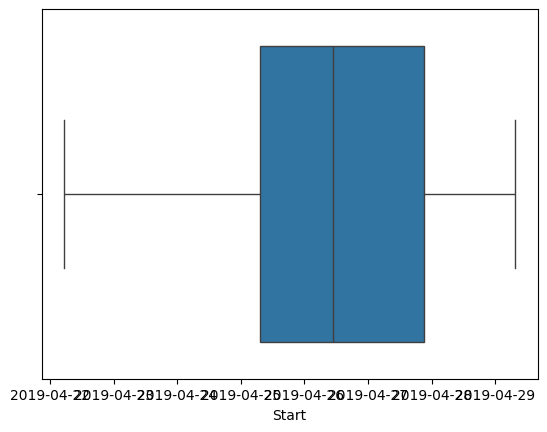

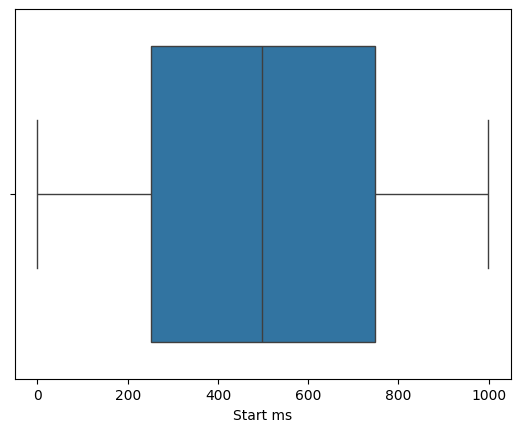

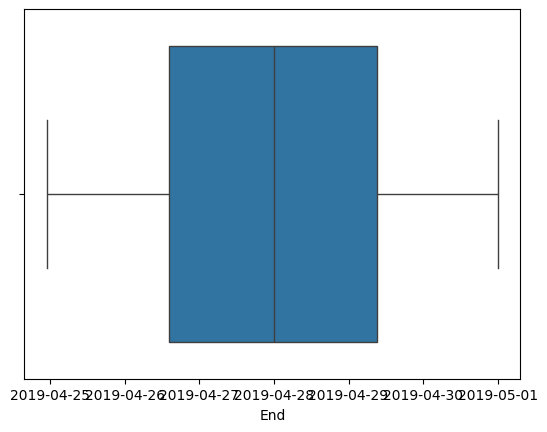

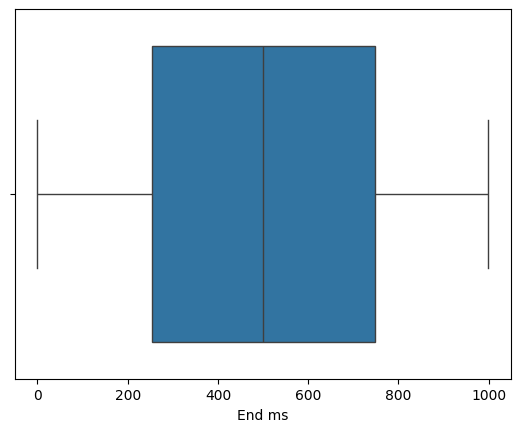

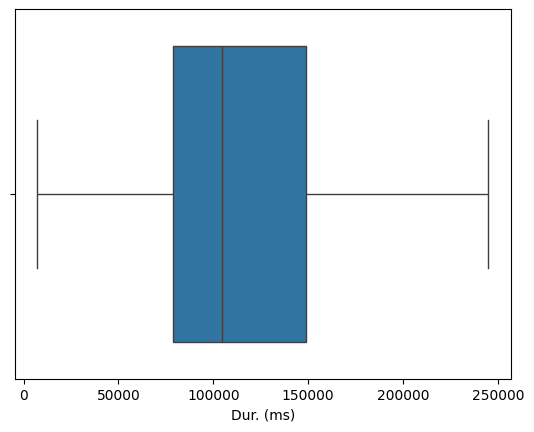

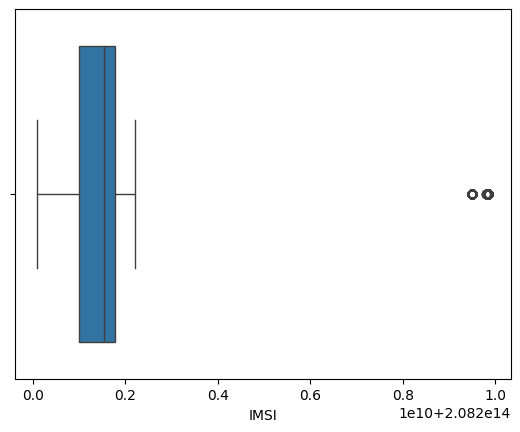

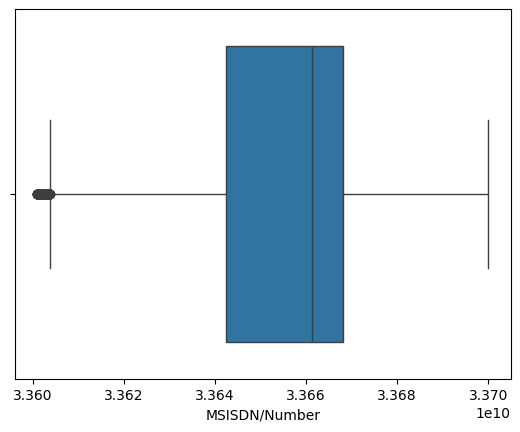

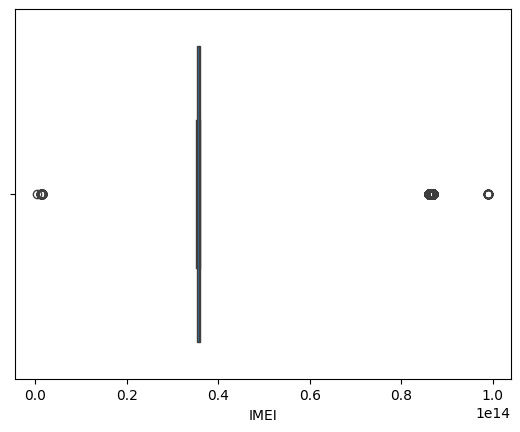

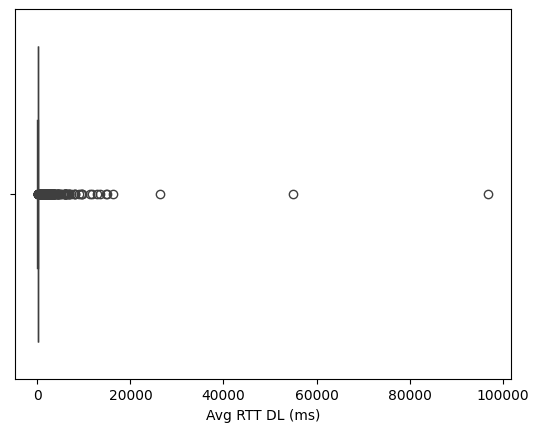

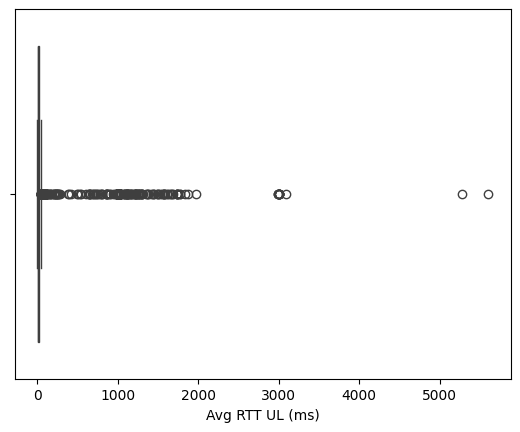

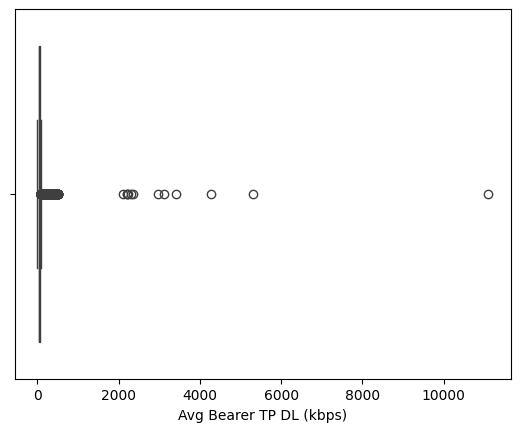

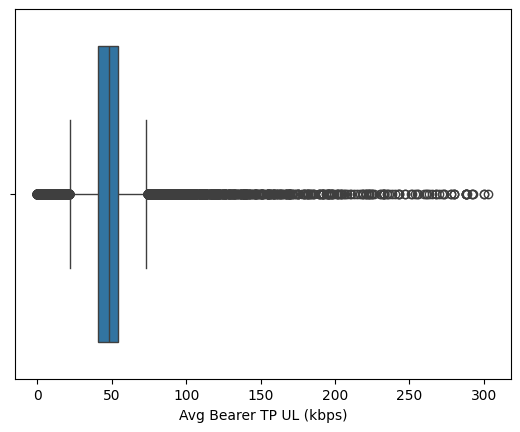

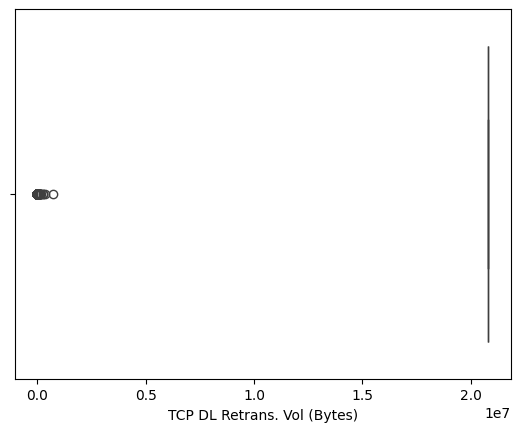

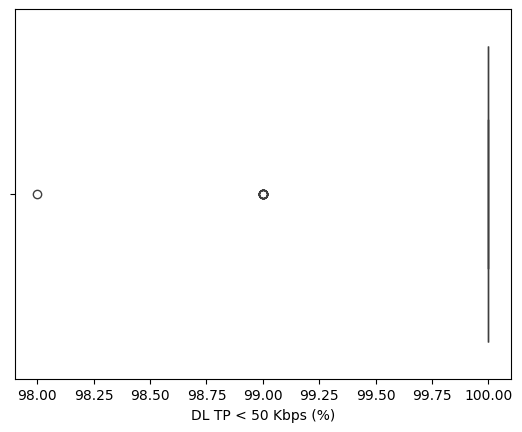

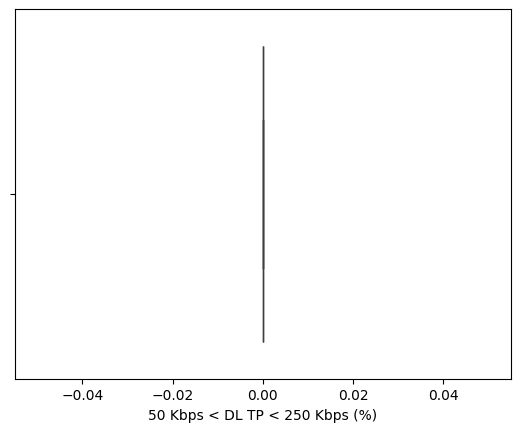

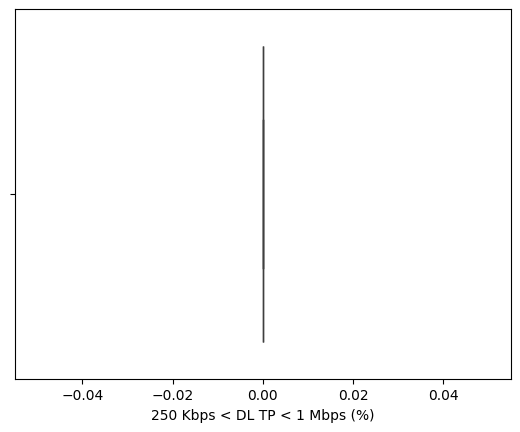

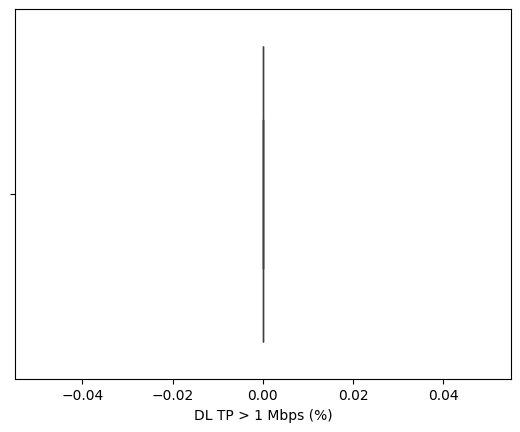

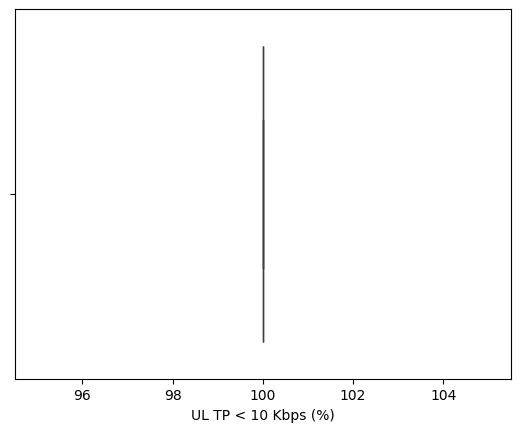

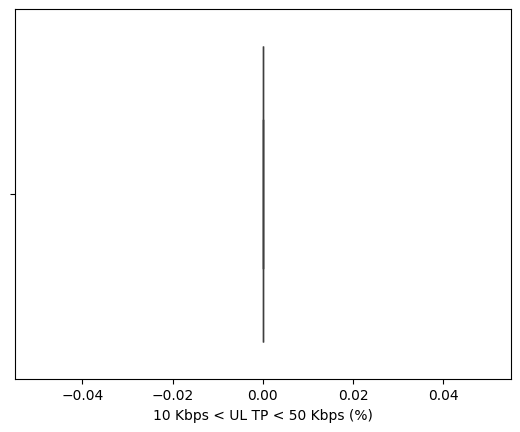

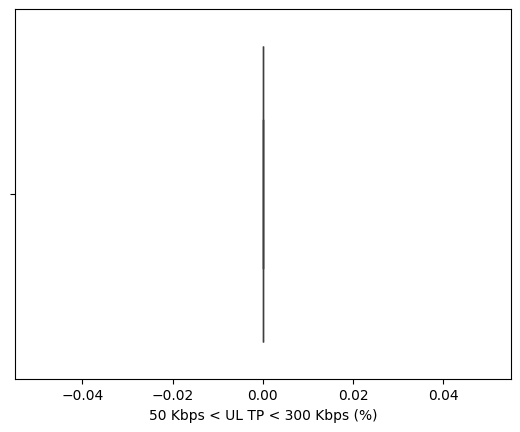

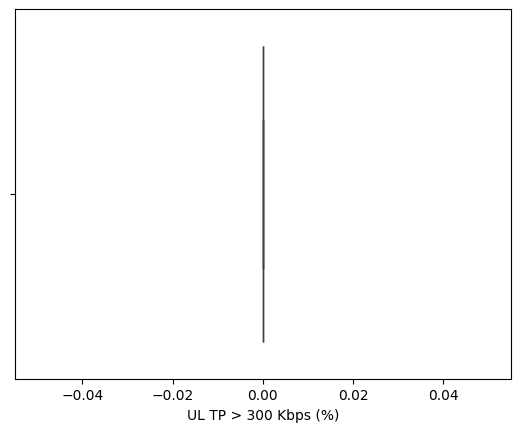

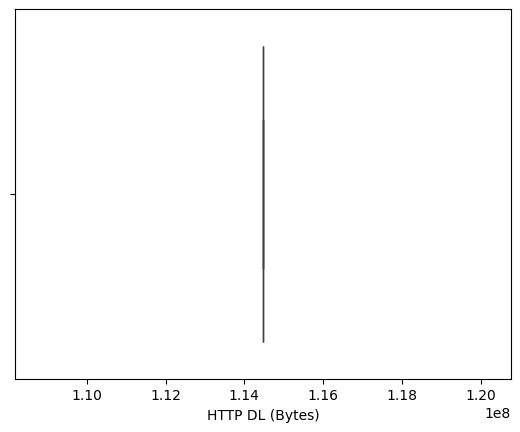

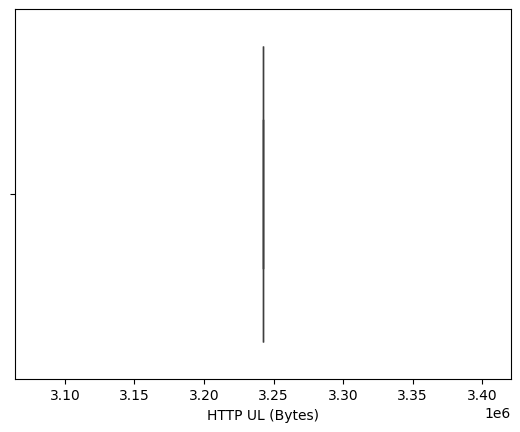

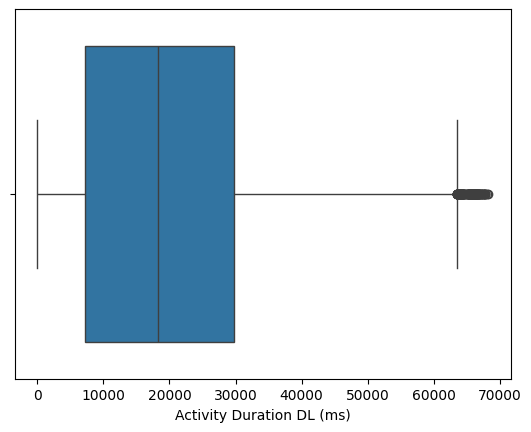

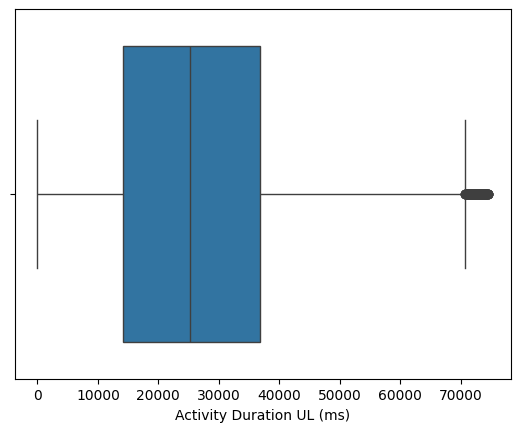

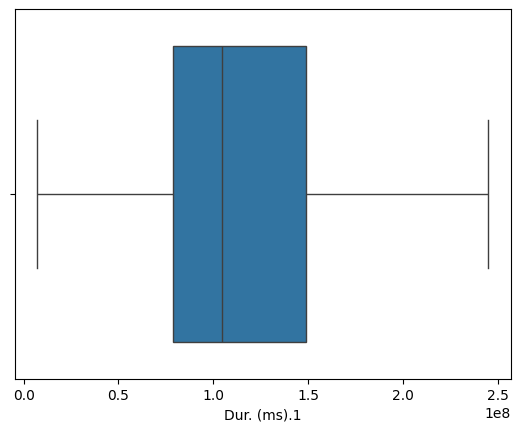

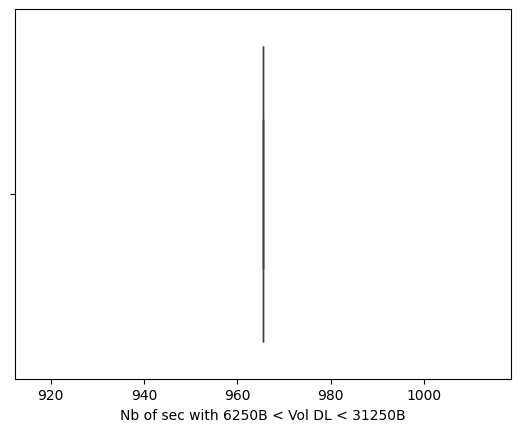

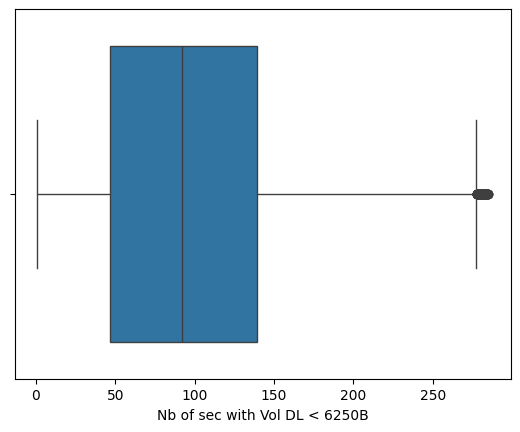

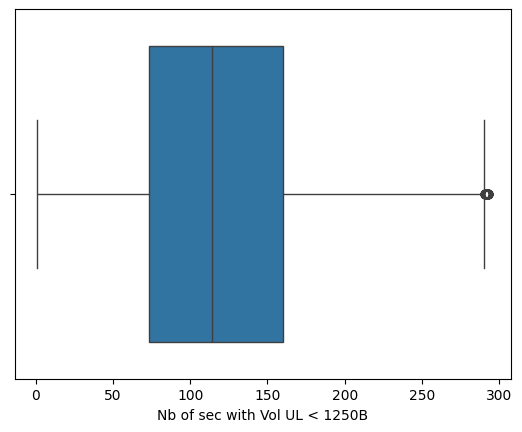

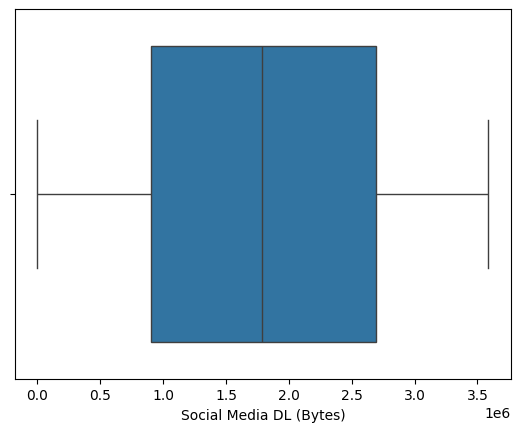

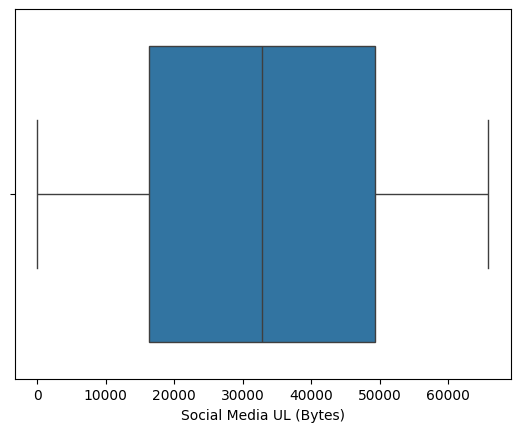

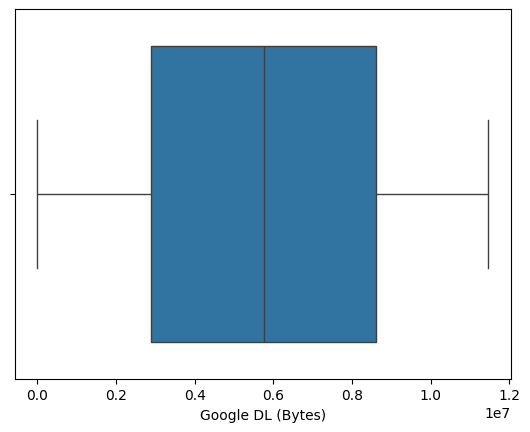

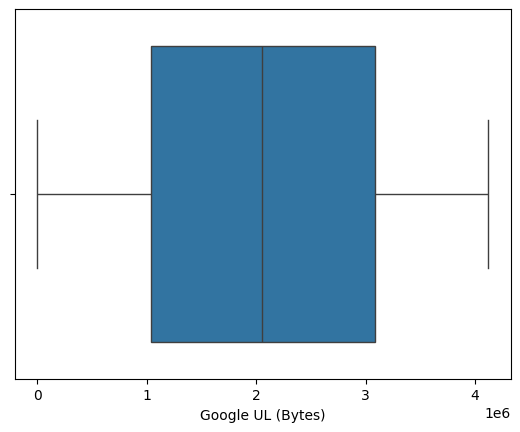

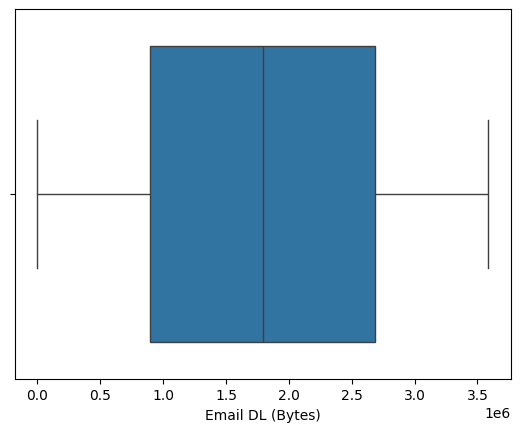

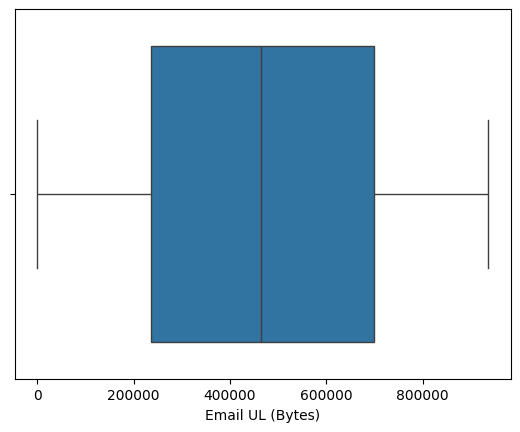

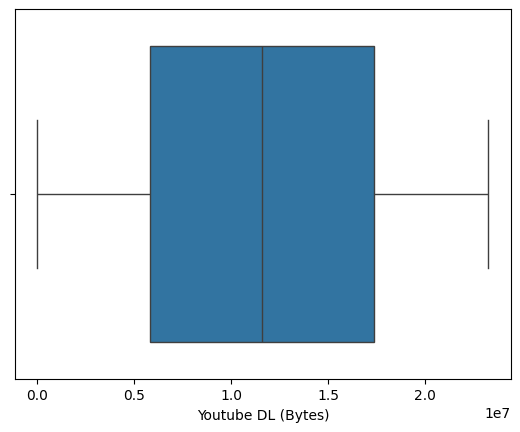

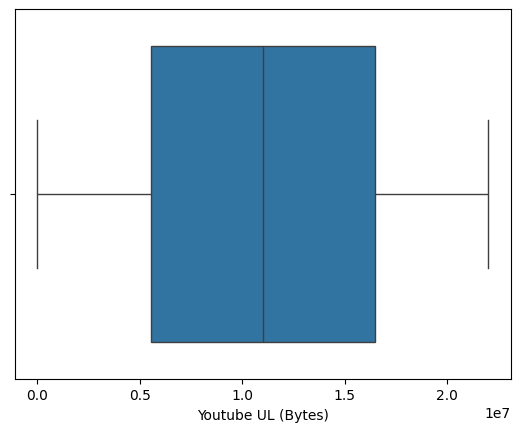

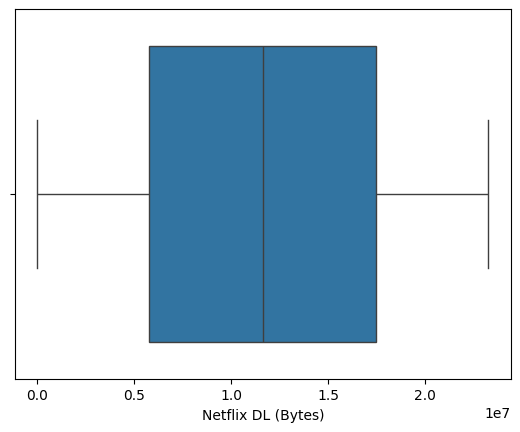

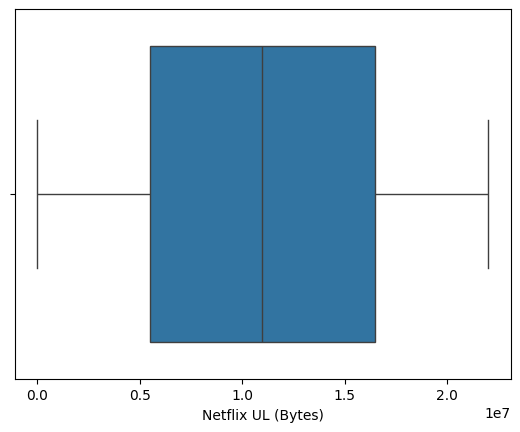

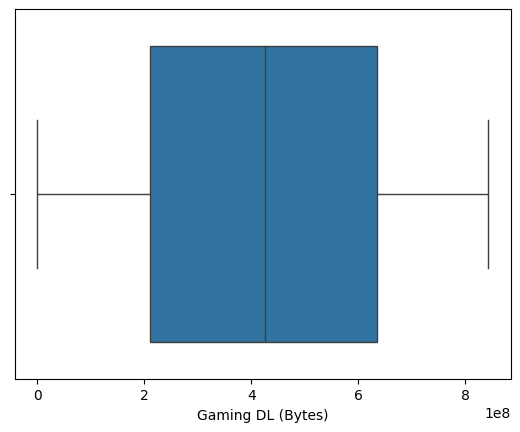

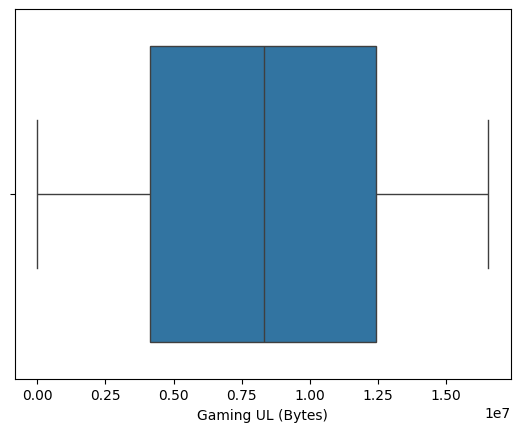

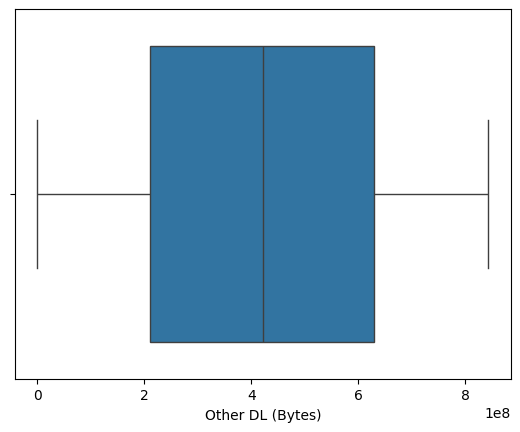

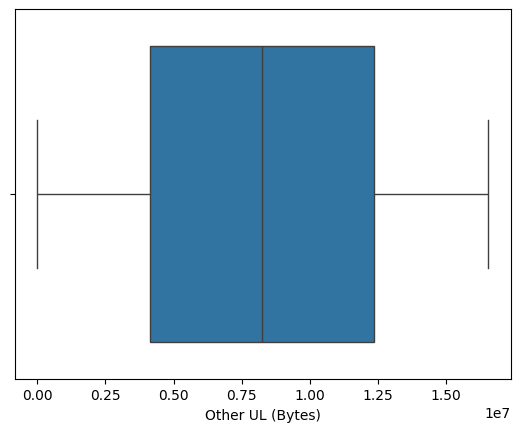

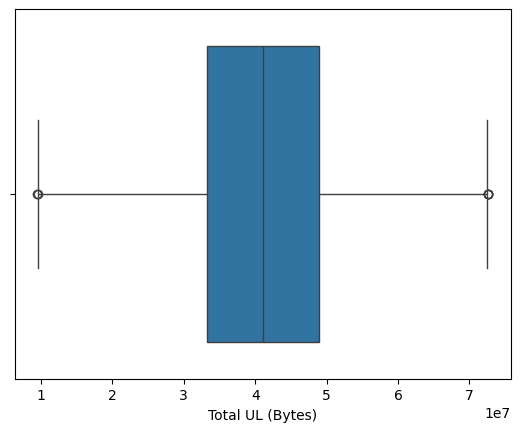

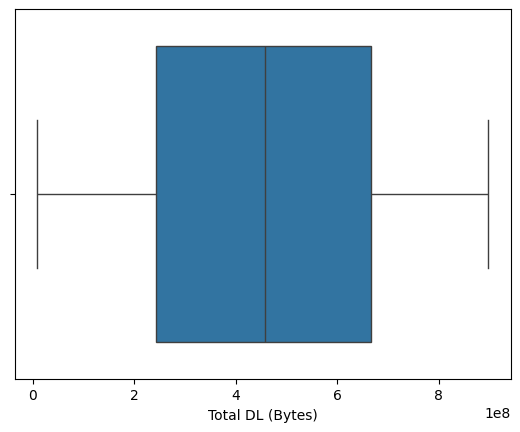

In [ ]:
# Iterate and create boxplots, handling potential errors
for i in numerical_data:
  try:
    sns.boxplot(x=i,data=cleaned_data)
    plt.show()
  except ValueError as e:
    print(f"Error creating boxplot for column {i}: {e}")
    print(f"Number of non-missing values in column {i}: {cleaned_data[i].count()}")

In [ ]:
# Non-Graphical Univariate Analysis
univariate_analysis = cleaned_data.describe()
print(univariate_analysis)

                               Start      Start ms  \
count                          57866  57866.000000   
mean   2019-04-26 17:17:52.850136832    499.656569   
min              2019-04-22 05:18:34      0.000000   
25%              2019-04-25 07:13:35    252.000000   
50%              2019-04-26 10:37:30    498.000000   
75%       2019-04-27 20:58:57.500000    749.000000   
max              2019-04-29 07:28:43    999.000000   
std                              NaN    287.995294   

                                 End        End ms      Dur. (ms)  \
count                          57866  57866.000000   57866.000000   
mean   2019-04-28 00:00:45.529879296    497.437182  110572.177773   
min              2019-04-24 23:00:02      0.000000    7293.000000   
25%              2019-04-26 14:23:36    253.000000   78810.250000   
50%       2019-04-28 00:00:23.500000    499.000000  104800.000000   
75%              2019-04-29 09:08:08    749.000000  148624.250000   
max              2019-04-30 23

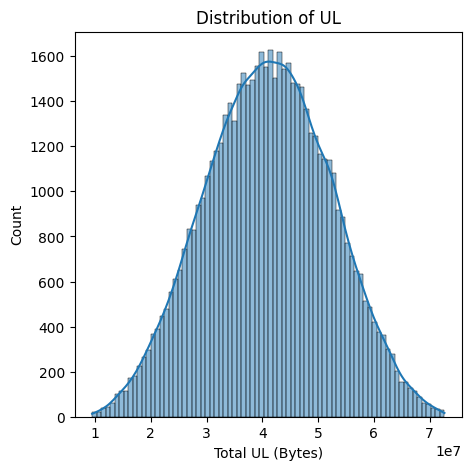

In [ ]:
# Univariate Analysis
plt.figure(figsize=(5, 5))
sns.histplot(cleaned_data['Total UL (Bytes)'], kde=True)
plt.title('Distribution of UL')
plt.show()

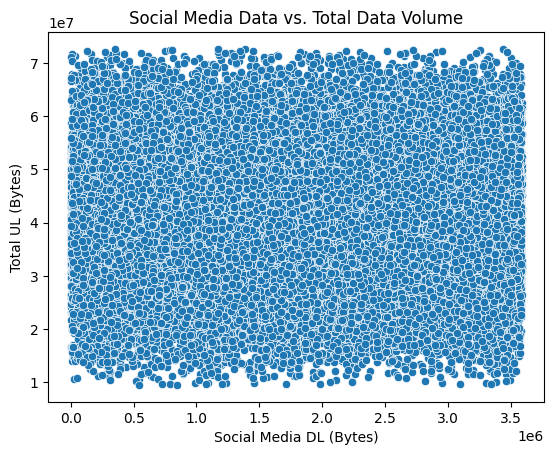

In [ ]:
# Bivariate Analysis
sns.scatterplot(x='Social Media DL (Bytes)', y='Total UL (Bytes)', data=cleaned_data)
plt.title('Social Media Data vs. Total Data Volume')
plt.show()

In [ ]:
cleaned_data.duplicated().sum()

0

In [ ]:
# Variable Transformation
cleaned_data['Social Media DL (Bytes)'] = cleaned_data.groupby('HTTP DL (Bytes)')['Dur. (ms)'].transform('sum')

# Check for unique values after transformation
if cleaned_data['Social Media DL (Bytes)'].nunique() > 1:
  cleaned_data['Decile'] = pd.qcut(cleaned_data['Social Media DL (Bytes)'], 5, labels=False, duplicates= 'drop')
  decile_data = cleaned_data.groupby('Decile')['Social Media DL (Bytes)'].sum()
  decile_data.plot(kind='bar', title='Total Data per Decile Class')
  plt.show()
else:
  print("All values in 'Social Media DL (Bytes)' are the same. Cannot create deciles.")

All values in 'Social Media DL (Bytes)' are the same. Cannot create deciles.


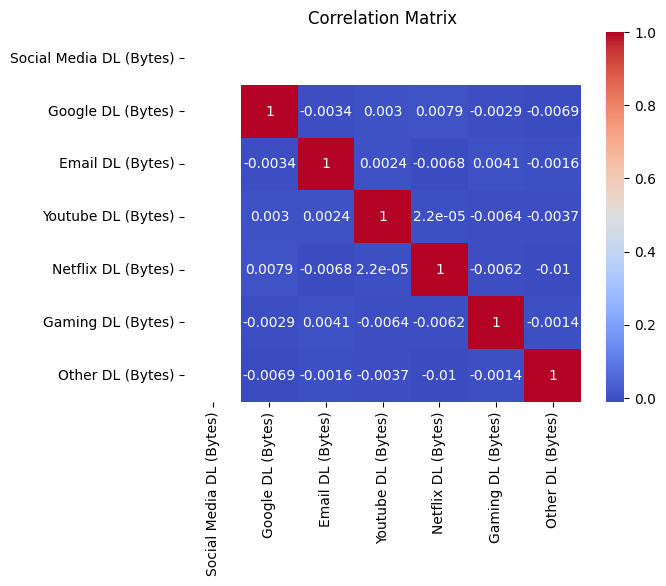

In [ ]:
# Correlation Analysis
correlation_matrix = cleaned_data[['Social Media DL (Bytes)', 'Google DL (Bytes)',
                           'Email DL (Bytes)', 'Youtube DL (Bytes)',
                           'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Dimensionality Reduction using PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data[['Social Media DL (Bytes)', 'Google DL (Bytes)',
                                         'Email DL (Bytes)', 'Youtube DL (Bytes)',
                                         'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                                         'Other DL (Bytes)']])

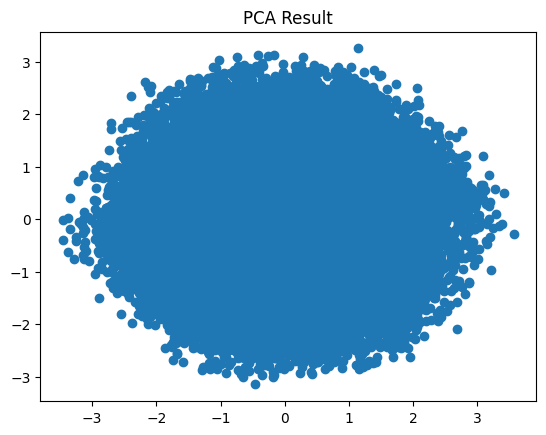

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.show()

In [ ]:
cleaned_data.to_csv('Project_5.csv', index=False)